In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline 

#from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

import warnings
warnings.simplefilter("ignore")

In [4]:
# read the data
column_name = ['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATTO','B','LSTAT','MEDV']
boston_data = pd.read_csv("housing.csv",header = None,delimiter=r"\s+",names=column_name)
boston_data

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATTO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
# shape of the data
boston_data.shape

(506, 14)

In [6]:
# view only 10 rows 
boston_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATTO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [34]:
boston_data.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [35]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
boston_data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [7]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOS        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATTO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

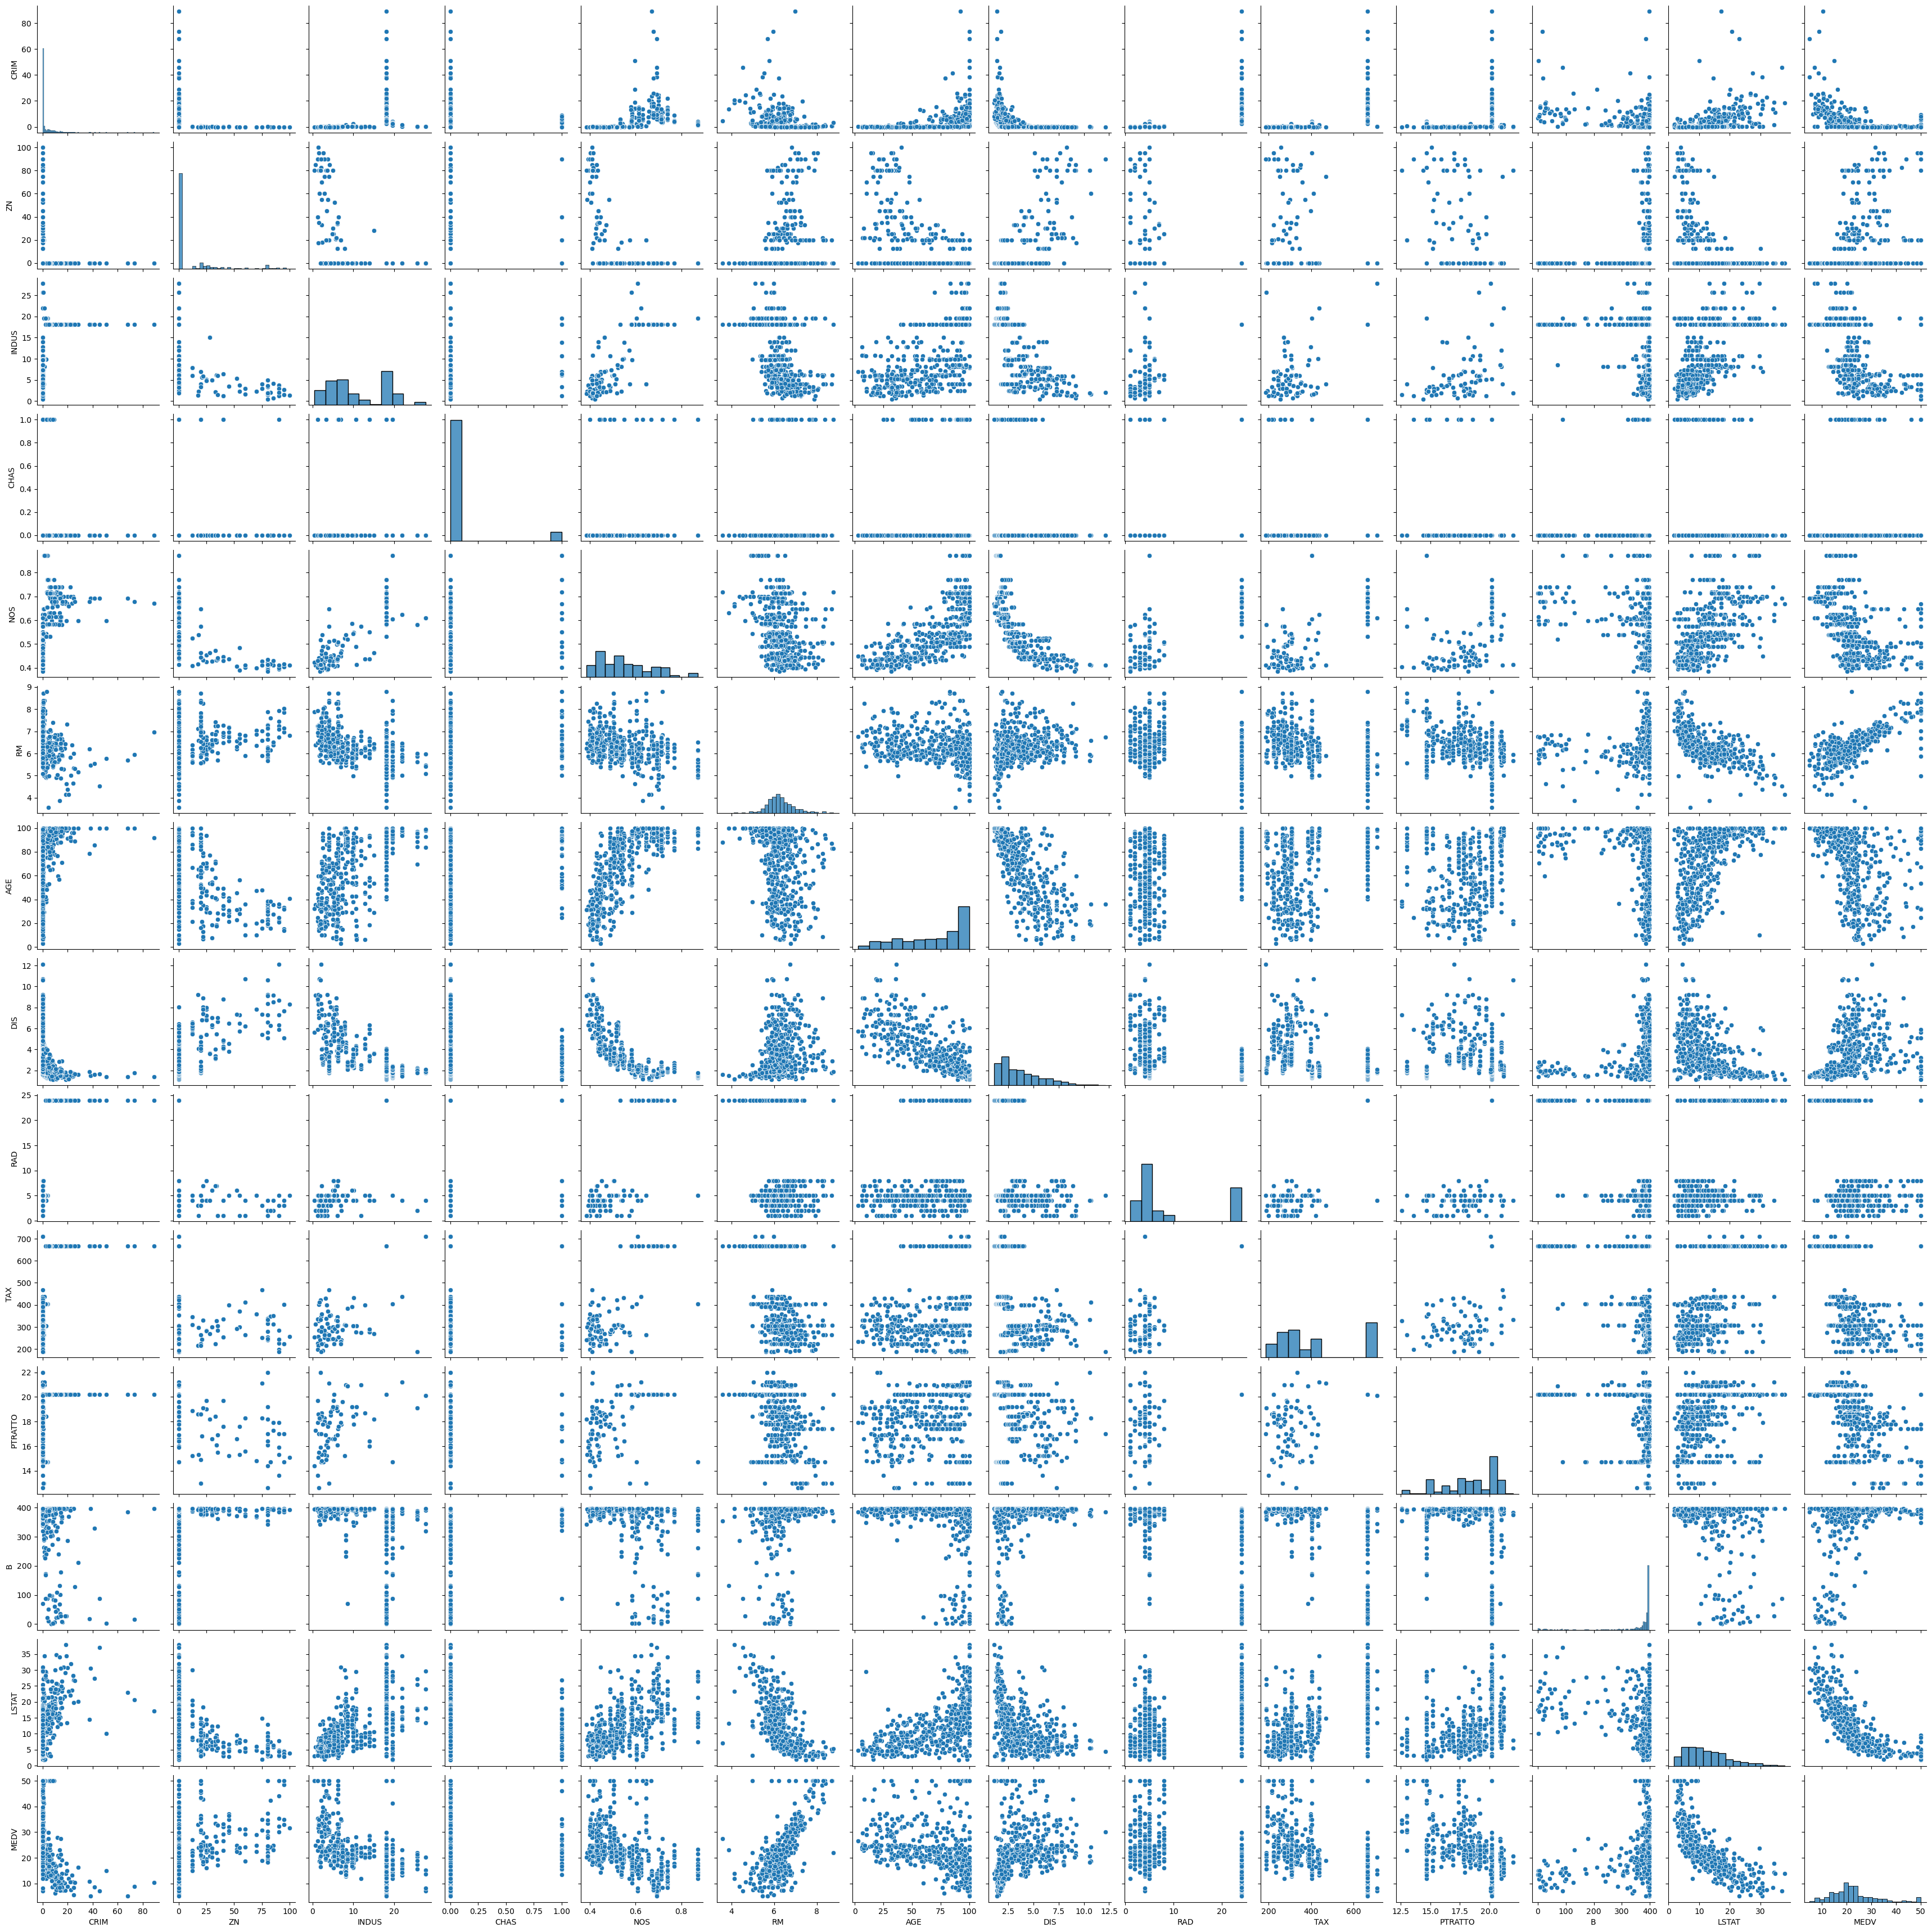

In [8]:
sns.pairplot(boston_data)

<Axes: ylabel='Count'>

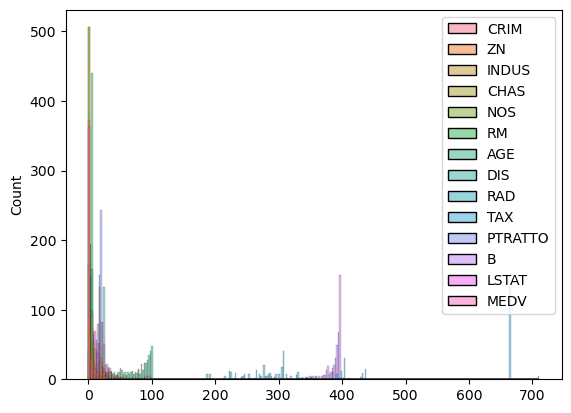

In [11]:
sns.histplot(boston_data)

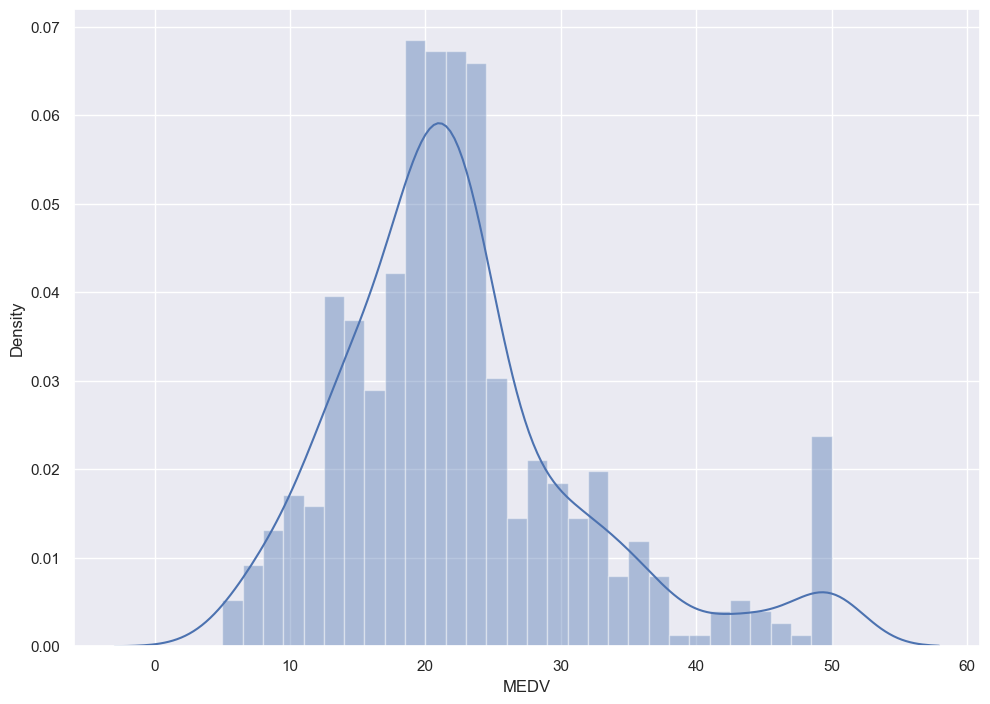

In [38]:
sns.set(rc={"figure.figsize":(11.7,8.27)})
sns.distplot(boston_data["MEDV"],bins=30)
plt.show()

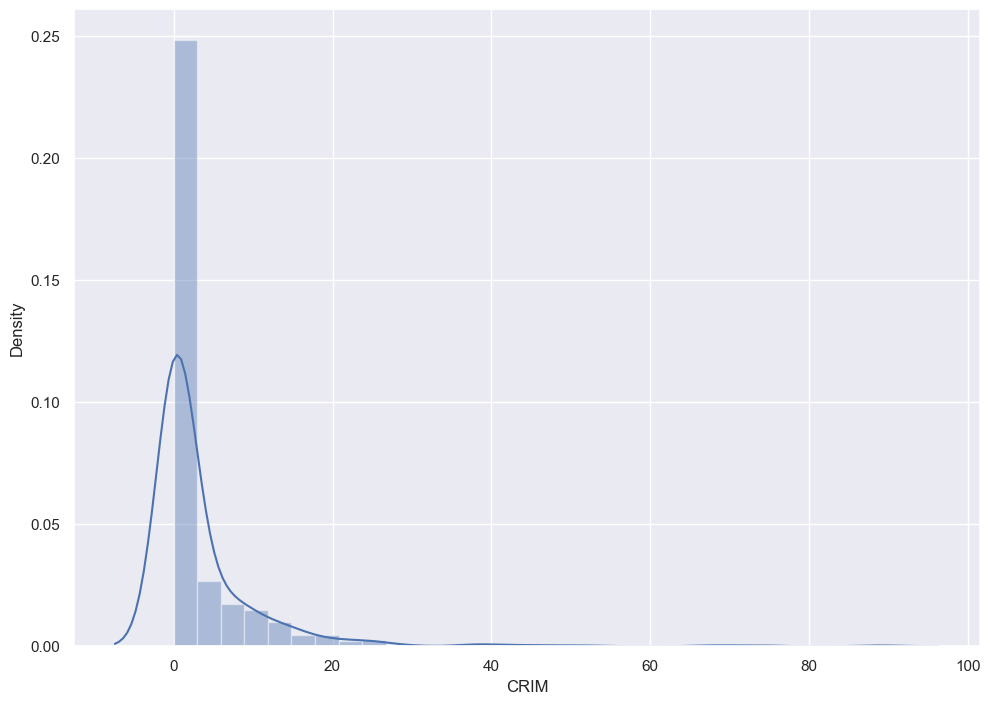

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data['CRIM'],bins=30)
plt.show()

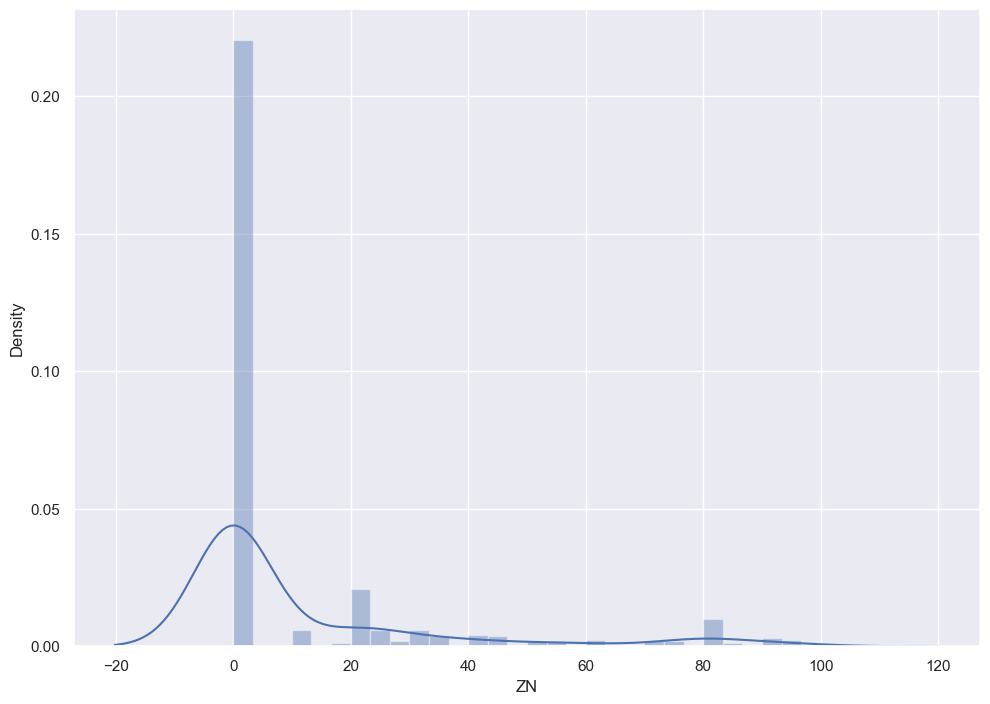

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data['ZN'],bins=30)
plt.show()

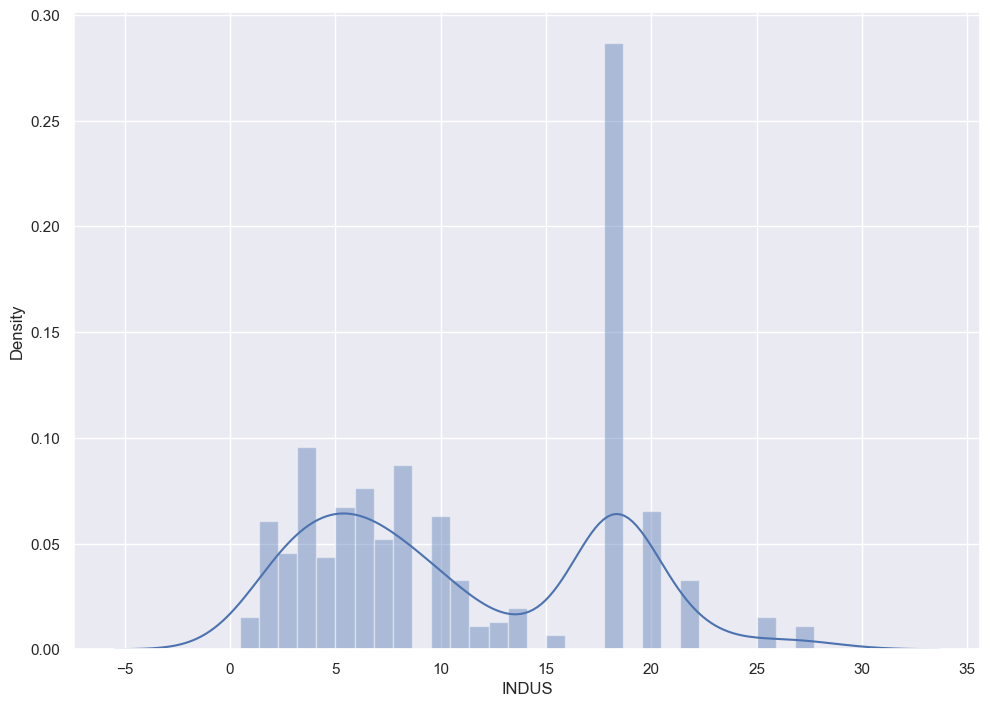

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data['INDUS'],bins=30)
plt.show()

<Axes: >

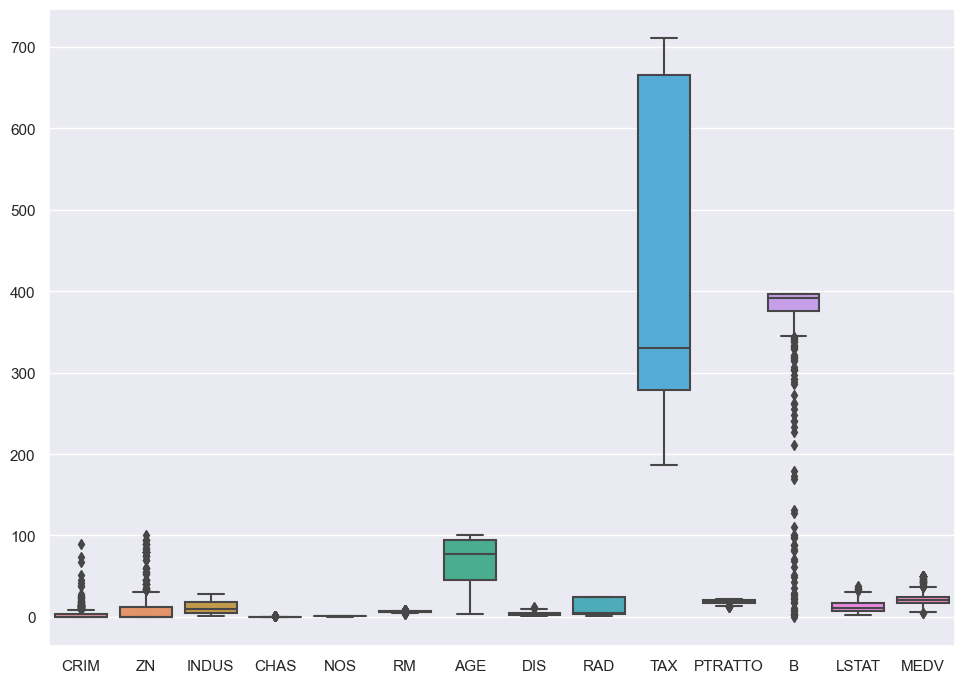

In [15]:
sns.boxplot(boston_data)

In [16]:
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATTO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOS,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

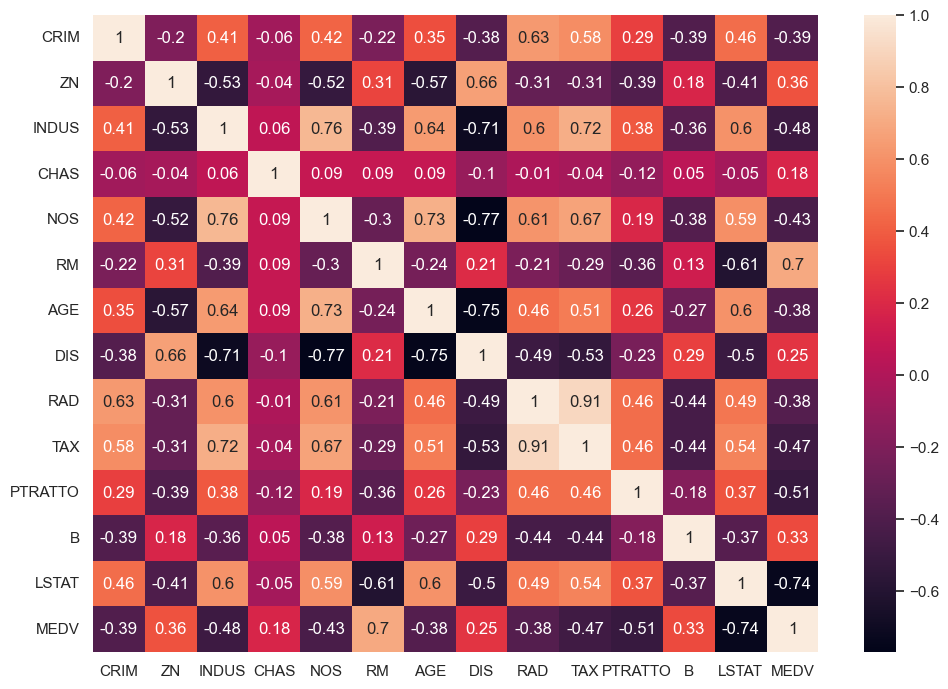

In [17]:
correlation_matrix=boston_data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [21]:
x = boston_data.iloc[:,:-1]
y = boston_data['MEDV']

In [24]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 5)

In [30]:
x_train

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATTO,B,LSTAT
33,1.15172,0.0,8.14,0,0.538,5.701,95.0,3.7872,4,307.0,21.0,358.77,18.35
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666.0,20.2,376.11,20.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666.0,20.2,392.68,14.98
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398.0,15.2,396.90,5.39
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391.0,19.2,393.29,17.60
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277.0,18.6,394.87,10.97


In [31]:
y_train

33     13.1
283    50.0
418     8.8
502    20.6
402    12.1
       ... 
486    19.1
189    34.9
495    23.1
206    24.4
355    20.6
Name: MEDV, Length: 404, dtype: float64

In [34]:
x_train.shape

(404, 13)

In [35]:
x_test.shape

(102, 13)

# LINEAR REGRESSION MODEL

In [23]:
lin_model = LinearRegression()

In [36]:
cvs=cross_val_score(lin_model,x,y,scoring="neg_mean_squared_error",cv=10)

In [37]:
print(cvs)
mean_cvs=np.mean(cvs)
print(mean_cvs)

[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
-34.705255944524865


In [39]:
lin_model.fit(x_train,y_train)
lin_model.predict(x_test)

array([37.56311787, 32.14445143, 27.06573629,  5.67080633, 35.09982577,
        5.85803701, 27.53708506, 31.81019188, 26.35634771, 22.77208748,
       31.91183048, 21.50224061, 23.70119983, 33.3622504 , 28.51633591,
       14.39456899,  0.19284025, 18.66247155, 13.71004139, 14.13408635,
        2.03263952, 19.7280831 , 38.18657429, 24.19760058, 31.30247973,
       11.14144544, 25.03636951, 23.27970871, 22.49420127, 20.52972594,
       15.16513744,  6.92553586, 18.3557733 , 22.37179804, 28.91287973,
       19.02980786, 30.19357214,  8.74384915, 40.86691522, 34.53763591,
       20.70224878,  2.59618963, 29.99590282, 12.15704798, 27.10186397,
       30.8052437 , -6.24169079, 19.84885777, 20.92973441, 12.43523958,
       20.4949947 , 19.19231742, 23.69073157, 12.67998473, 17.14252424,
       25.04649176, 34.77758126, 15.23294903, 28.22306193, 21.08745388,
       20.39506129, 25.79476888, 14.72463673, 33.18635032, 23.17771307,
       13.11057248, 19.23154617, 24.61162961, 21.50327036, 22.00

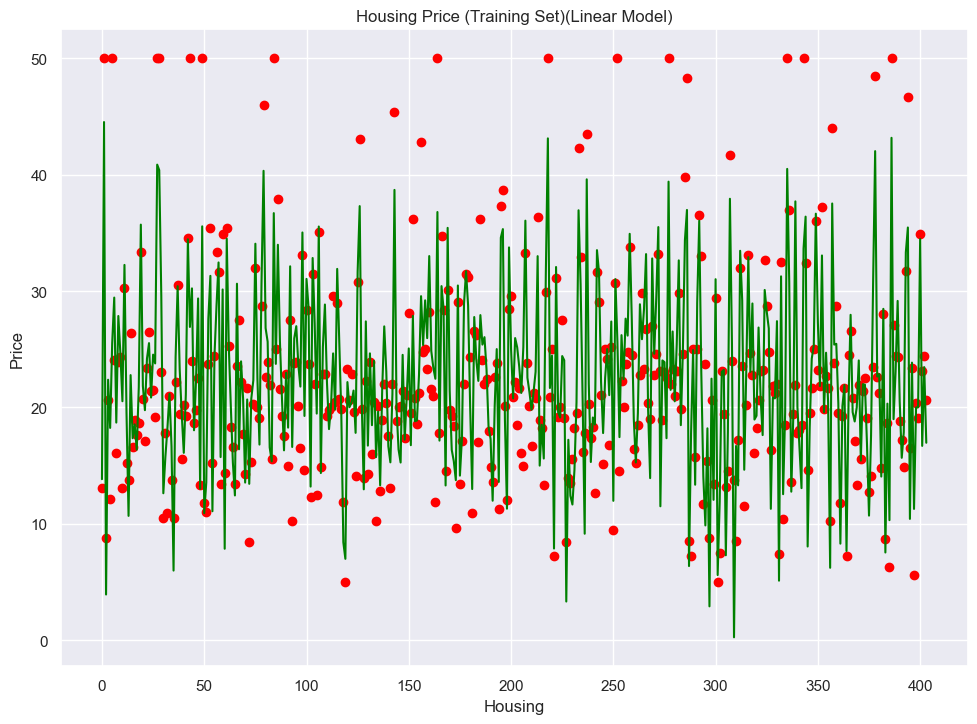

In [40]:
x_train1=np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color="red")
plt.plot(x_train1,lin_model.predict(x_train),color="green")
plt.title("Housing Price (Training Set)(Linear Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

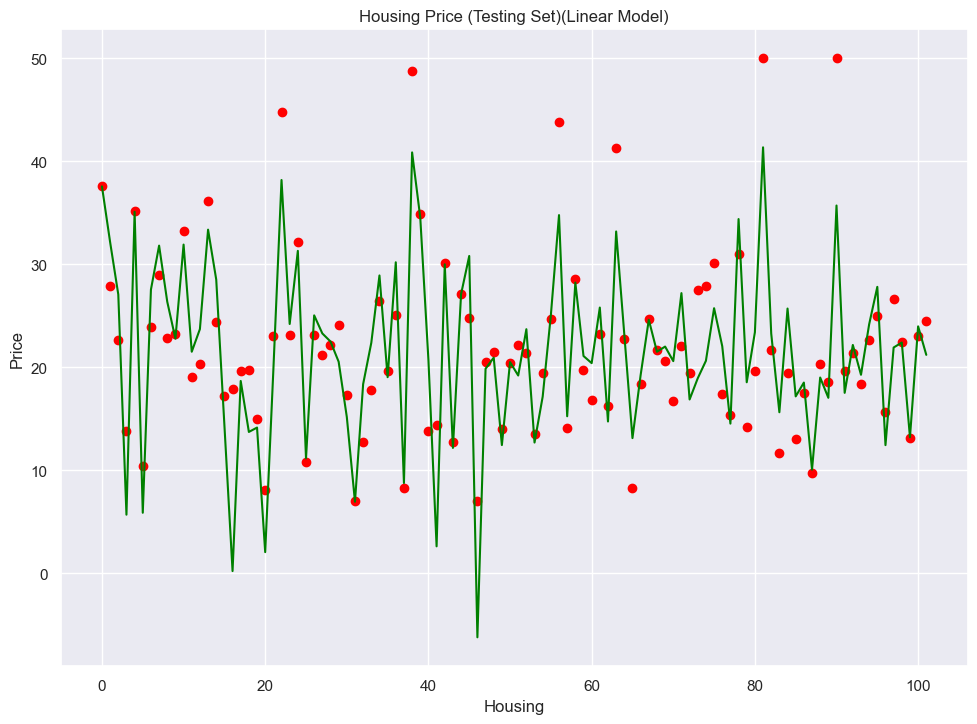

In [42]:
x_test1=np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color="red")
plt.plot(x_test1,lin_model.predict(x_test),color="green")
plt.title("Housing Price (Testing Set)(Linear Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

# Ridge Regression Model

In [43]:
ridge = Ridge()
params = {"alpha":[1e-15,1e-10,1e-8,1e-2,1,5,10]}

ridge_model = GridSearchCV(ridge,params,scoring = "neg_mean_squared_error",cv = 10)

In [44]:
ridge_model.fit(x_train,y_train)
ridge_model.predict(x_test)

array([37.55941537, 32.14462386, 27.06389466,  5.66288114, 35.09653813,
        5.85547896, 27.54335682, 31.80456995, 26.35286514, 22.76353597,
       31.90673705, 21.51125336, 23.70154494, 33.36505636, 28.51381422,
       14.39597845,  0.17450174, 18.68921633, 13.71219885, 14.12367397,
        2.01809408, 19.73086682, 38.18284222, 24.19988164, 31.30182003,
       11.14800053, 25.03887303, 23.2764881 , 22.50855242, 20.53793309,
       15.15603698,  6.91254241, 18.35839496, 22.37842661, 28.90793341,
       19.03226237, 30.18771631,  8.7410183 , 40.87741304, 34.54236045,
       20.70530562,  2.59043069, 29.99153445, 12.16195116, 27.09132982,
       30.80037631, -6.24554044, 19.84244671, 20.9570884 , 12.43352721,
       20.49095699, 19.19606318, 23.6797889 , 12.68025597, 17.16865797,
       25.05314269, 34.77585696, 15.23836324, 28.21485879, 21.08485459,
       20.39795122, 25.7949218 , 14.7246174 , 33.179988  , 23.19184978,
       13.11234865, 19.23623349, 24.61405643, 21.49630518, 21.99

In [45]:
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.01}
-25.221198489009215


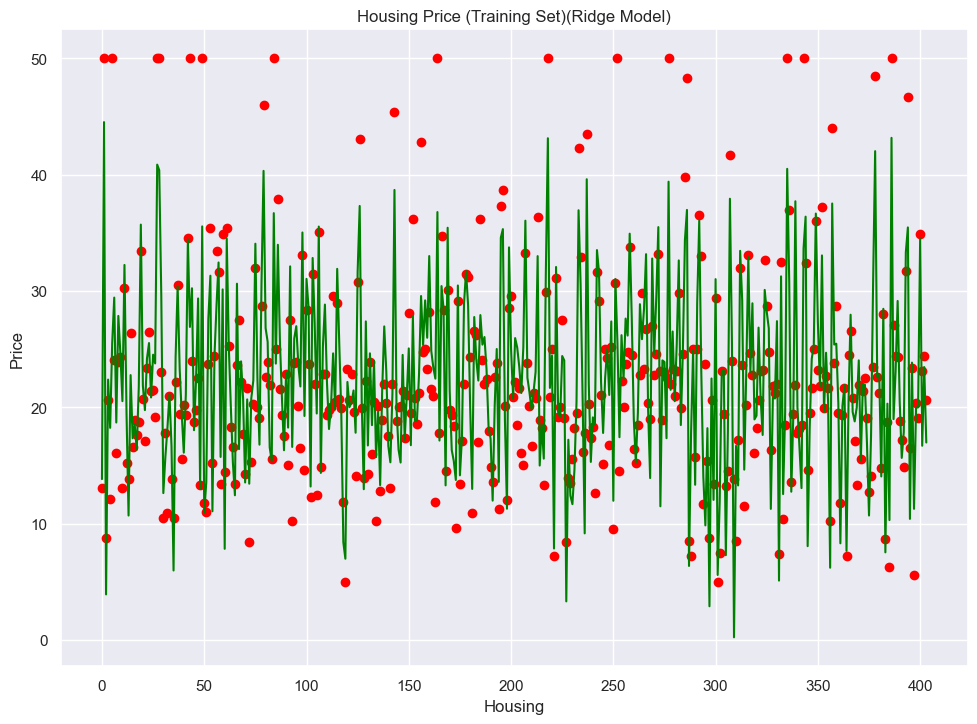

In [46]:
x_train1=np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color="red")
plt.plot(x_train1,ridge_model.predict(x_train),color="green")
plt.title("Housing Price (Training Set)(Ridge Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

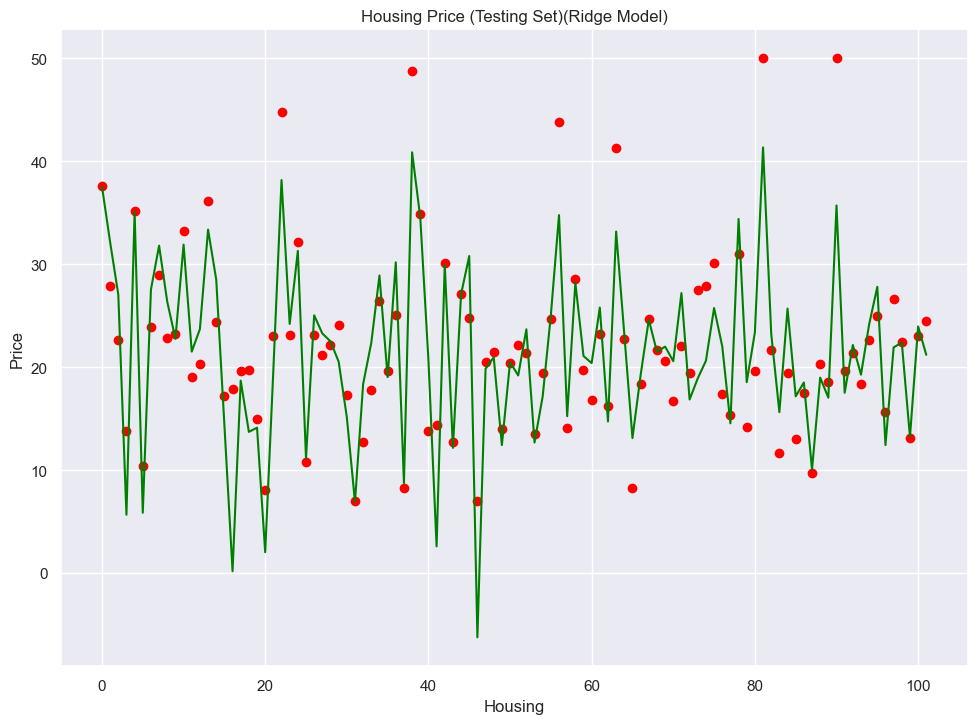

In [47]:
x_test1=np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color="red")
plt.plot(x_test1,ridge_model.predict(x_test),color="green")
plt.title("Housing Price (Testing Set)(Ridge Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show() 

In [49]:
# anotation means written number on the graph.

# cross validation means you separate different part.

# Lasso Regression Model

In [48]:
lasso=Lasso()
params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10]}
lasso_model=GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=10)

In [49]:
lasso_model.fit(x_train,y_train)
lasso_model.predict(x_test)

array([37.55941537, 32.14462386, 27.06389466,  5.66288114, 35.09653813,
        5.85547896, 27.54335682, 31.80456995, 26.35286514, 22.76353597,
       31.90673705, 21.51125336, 23.70154494, 33.36505636, 28.51381422,
       14.39597845,  0.17450174, 18.68921633, 13.71219885, 14.12367397,
        2.01809408, 19.73086682, 38.18284222, 24.19988164, 31.30182003,
       11.14800053, 25.03887303, 23.2764881 , 22.50855242, 20.53793309,
       15.15603698,  6.91254241, 18.35839496, 22.37842661, 28.90793341,
       19.03226237, 30.18771631,  8.7410183 , 40.87741304, 34.54236045,
       20.70530562,  2.59043069, 29.99153445, 12.16195116, 27.09132982,
       30.80037631, -6.24554044, 19.84244671, 20.9570884 , 12.43352721,
       20.49095699, 19.19606318, 23.6797889 , 12.68025597, 17.16865797,
       25.05314269, 34.77585696, 15.23836324, 28.21485879, 21.08485459,
       20.39795122, 25.7949218 , 14.7246174 , 33.179988  , 23.19184978,
       13.11234865, 19.23623349, 24.61405643, 21.49630518, 21.99

In [50]:
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.01}
-25.221198489009215


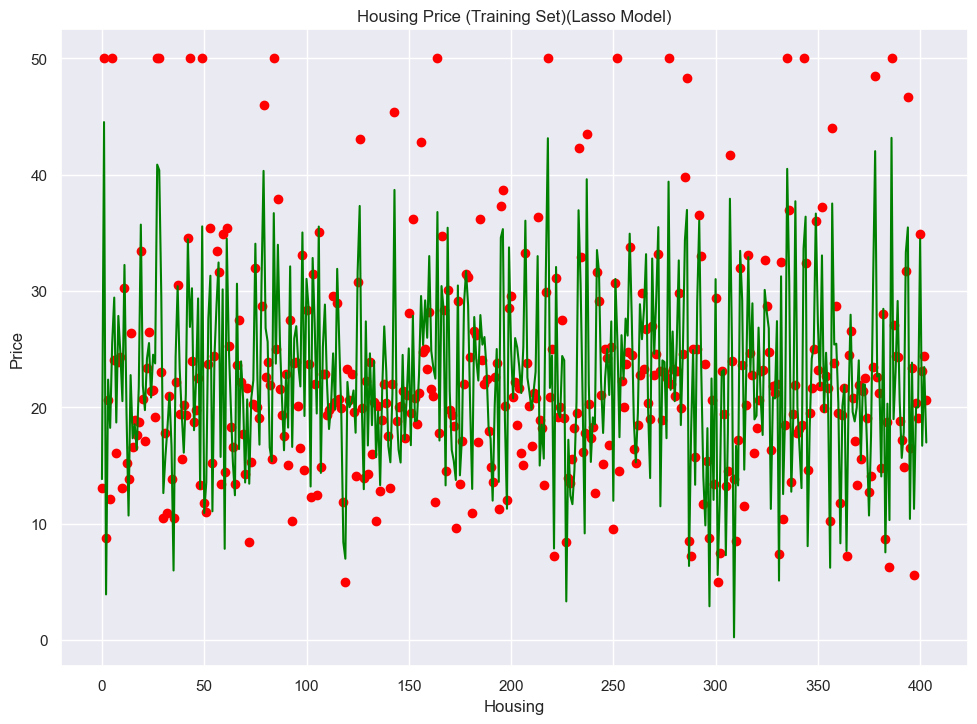

In [51]:
x_train1=np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color="red")
plt.plot(x_train1,lasso_model.predict(x_train),color="green")
plt.title("Housing Price (Training Set)(Lasso Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

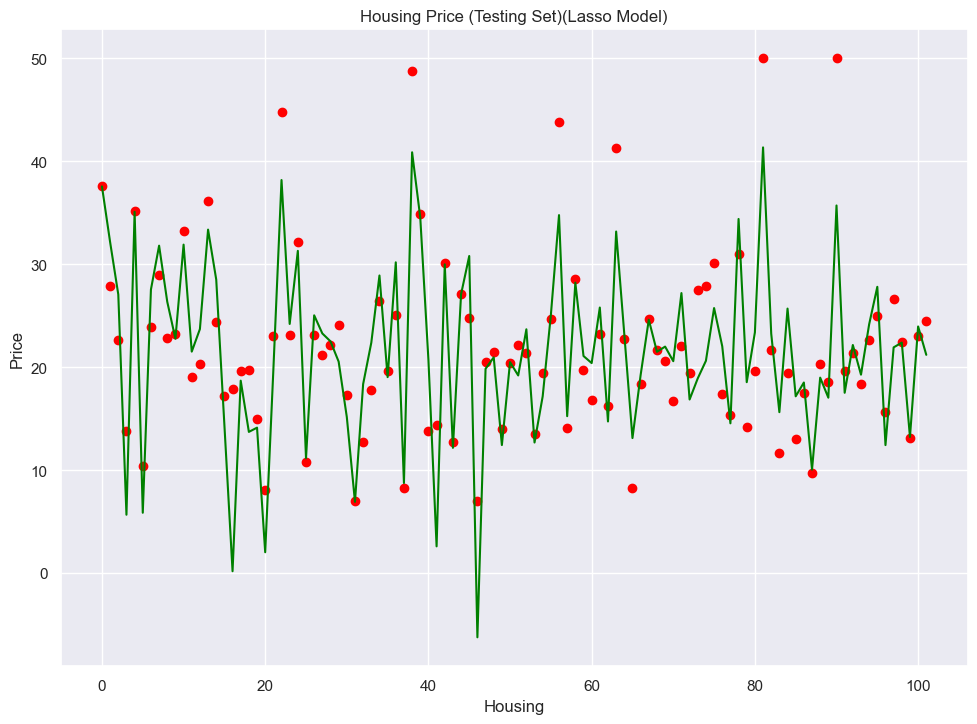

In [53]:
x_test1=np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color="red")
plt.plot(x_test1,lasso_model.predict(x_test),color="green")
plt.title("Housing Price (Testing Set)(Lasso Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

# Elastic Net

In [54]:
elasticnet=ElasticNet()
params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10]}
elastic_model=GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=10)

In [55]:
elastic_model.fit(x_train,y_train)
elastic_model.predict(x_test)

array([37.55941537, 32.14462386, 27.06389466,  5.66288114, 35.09653813,
        5.85547896, 27.54335682, 31.80456995, 26.35286514, 22.76353597,
       31.90673705, 21.51125336, 23.70154494, 33.36505636, 28.51381422,
       14.39597845,  0.17450174, 18.68921633, 13.71219885, 14.12367397,
        2.01809408, 19.73086682, 38.18284222, 24.19988164, 31.30182003,
       11.14800053, 25.03887303, 23.2764881 , 22.50855242, 20.53793309,
       15.15603698,  6.91254241, 18.35839496, 22.37842661, 28.90793341,
       19.03226237, 30.18771631,  8.7410183 , 40.87741304, 34.54236045,
       20.70530562,  2.59043069, 29.99153445, 12.16195116, 27.09132982,
       30.80037631, -6.24554044, 19.84244671, 20.9570884 , 12.43352721,
       20.49095699, 19.19606318, 23.6797889 , 12.68025597, 17.16865797,
       25.05314269, 34.77585696, 15.23836324, 28.21485879, 21.08485459,
       20.39795122, 25.7949218 , 14.7246174 , 33.179988  , 23.19184978,
       13.11234865, 19.23623349, 24.61405643, 21.49630518, 21.99

In [56]:
print(elastic_model.best_params_)
print(elastic_model.best_score_)

{'alpha': 0.01}
-25.221198489009215


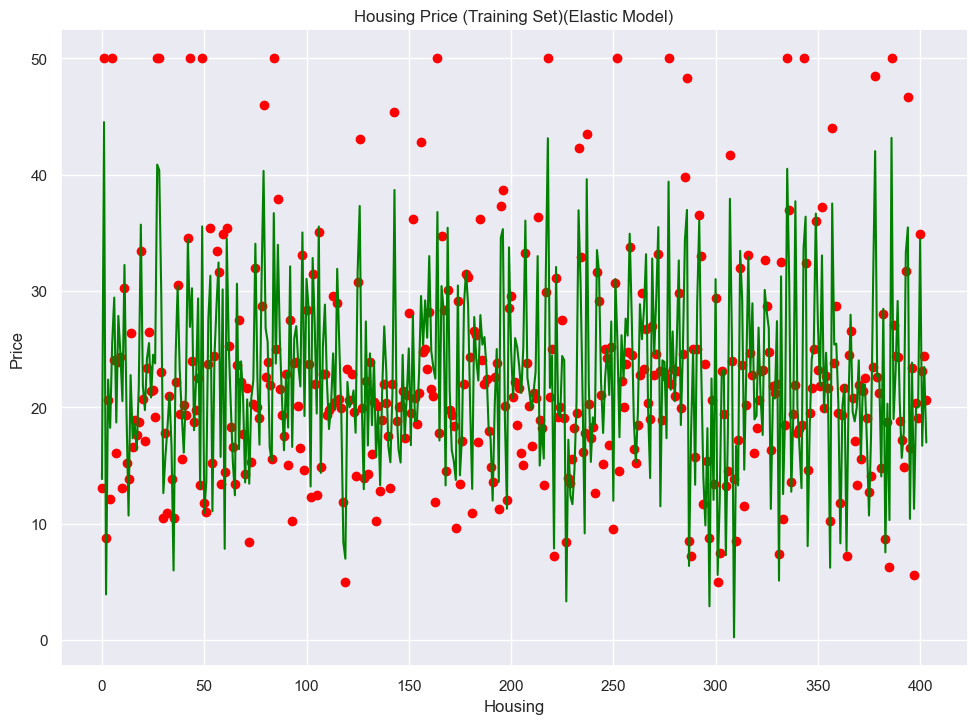

In [57]:
x_train1=np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color="red")
plt.plot(x_train1,elastic_model.predict(x_train),color="green")
plt.title("Housing Price (Training Set)(Elastic Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()